# Media pipe 

# importing the modules we have used 
OpenCV, MediaPipe, and CSV libraries

In [4]:
%pip install opencv-python

%pip install mediapipe as mp
%pip install csv

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
    --------------------------------------- 0.8/38.8 MB 1.9 MB/s eta 0:00:21
   - -------------------------------------- 1.0/38.8 MB 1.9 MB/s eta 0:00:21
   - -------------------------------------- 1.3/38.8 MB 1.8 MB/s eta 0:00:21
   - -------------------------------------- 1.8/38.8 MB 1.8 MB/s eta 0:00:21
   -- ------------------------------------- 2.1/38.8 MB 1.8 MB/s eta 0:00:21
   -- ------------------------------------- 2.6/38.8 MB 1.8 MB/s eta 0:00:20
   -- ------------------------------------- 2.9/38.8 MB 1.8 MB/s eta 0:00:20
   --- ------------------------------------ 3.4/38.8 MB 1.8 MB/s eta 0:00:20
   --- ------------------------------------ 3.7/38.8 MB 1.8 MB/s eta 0:00:20
   ---- ----------------------------------- 3.9/38.8 MB 1.8 MB/s eta 0:00:20
   ---- ----------------------------------- 4.5/38.8 MB 1.8 MB/s eta 0:00:20
   ---- -----

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


In [7]:
import cv2
import mediapipe as mp
import csv

write_landmarks_to_csv 

1. takes in detcted landmarks 
2. frame number 
3. list of CSV data and marks landmark points to console    

In [8]:
def write_landmarks_to_csv(landmarks, frame_number, csv_data):
    print(f"Landmark coordinates for frame {frame_number}:")
    for idx, landmark in enumerate(landmarks):
        print(f"{mp_pose.PoseLandmark(idx).name}: (x: {landmark.x}, y: {landmark.y}, z: {landmark.z})")
        csv_data.append([frame_number, mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y, landmark.z])
    print("\n")

Defining the input and output path to video 

In [10]:
video_path = r"G:\Pose AI\Input Video\WhatsApp Video 2024-09-18 at 10.22.46_d6797a9c.mp4"
output_csv = r'G:\Pose AI\Output\output_file.csv'

Initializing media post utilities <br>

loading video using VideoCapture function  using Open CV

In [11]:
# Initialize MediaPipe Pose and Drawing utilities
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

# Open the video file
cap = cv2.VideoCapture(video_path)

Processing Each frame 

1. Reads each frame of the video and processes it using Media Pose 
2. Places a landmark on the frame using MediaPipe ultilities 
3. The detected landmarks are written using write_landmark_csv to csv file to store the points 


In [12]:
frame_number = 0
csv_data = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Pose
    result = pose.process(frame_rgb)

    # Draw the pose landmarks on the frame
    if result.pose_landmarks:
        mp_drawing.draw_landmarks(frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Add the landmark coordinates to the list and print them
        write_landmarks_to_csv(result.pose_landmarks.landmark, frame_number, csv_data)

    # Display the frame
    cv2.imshow('MediaPipe Pose', frame)

    # Exit if 'q' keypyt

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Landmark coordinates for frame 0:
NOSE: (x: 0.7074025869369507, y: 0.4433179795742035, z: -0.02320881001651287)
LEFT_EYE_INNER: (x: 0.7106435894966125, y: 0.43239742517471313, z: -0.03511672839522362)
LEFT_EYE: (x: 0.7116804718971252, y: 0.43229106068611145, z: -0.03513791039586067)
LEFT_EYE_OUTER: (x: 0.7127469778060913, y: 0.43209245800971985, z: -0.03512721136212349)
RIGHT_EYE_INNER: (x: 0.7100780606269836, y: 0.4323587715625763, z: -0.014540125615894794)
RIGHT_EYE: (x: 0.710609495639801, y: 0.4321853816509247, z: -0.014519243501126766)
RIGHT_EYE_OUTER: (x: 0.7111766338348389, y: 0.4318593740463257, z: -0.014532258734107018)
LEFT_EAR: (x: 0.7208754420280457, y: 0.43573009967803955, z: -0.06562057137489319)
RIGHT_EAR: (x: 0.7186416387557983, y: 0.4349514842033386, z: 0.026176774874329567)
MOUTH_LEFT: (x: 0.7105783224105835, y: 0.45177775621414185, z: -0.0326833613216877)
MOUTH_RIGHT: (x: 0.7096072435379028, y: 0.4518491327762604, z: -0.006105425301939249)
LEFT_SHOULDER: (x: 0.7310673

In [13]:
def calculate_angle(hip, knee, ankle):
    # Convert points to numpy arrays
    hip = np.array([hip.x, hip.y])
    knee = np.array([knee.x, knee.y])
    ankle = np.array([ankle.x, ankle.y])

    # Calculate vectors
    hip_knee = hip - knee
    knee_ankle = ankle - knee

    # Calculate the dot product and the norms
    dot_product = np.dot(hip_knee, knee_ankle)
    norm_hip_knee = np.linalg.norm(hip_knee)
    norm_knee_ankle = np.linalg.norm(knee_ankle)

    # Calculate the angle in radians and then convert to degrees
    angle = np.arccos(dot_product / (norm_hip_knee * norm_knee_ankle))
    angle_in_degrees = np.degrees(angle)

    return angle_in_degrees



In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 


In [17]:
# Open the video file
cap = cv2.VideoCapture(video_path)

frame_number = 0
angles = []  # List to store knee angles

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Pose
    result = pose.process(frame_rgb)

    # Draw the pose landmarks on the frame and calculate angle if landmarks are present
    if result.pose_landmarks:
        mp_drawing.draw_landmarks(frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Get the relevant landmarks for left leg (You can change to right leg by using RIGHT_HIP, RIGHT_KNEE, RIGHT_ANKLE)
        landmarks = result.pose_landmarks.landmark
        left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
        left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE]
        left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE]

        # Calculate the angle at the knee
        knee_angle = calculate_angle(left_hip, left_knee, left_ankle)
        angles.append(knee_angle)

        # Optionally, you can print or display the angle
        print(f"Frame {frame_number}: Knee Angle = {knee_angle:.2f} degrees")

    # Display the frame
    cv2.imshow('MediaPipe Pose', frame)

    # Increment the frame number
    frame_number += 1

    # Exit if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()



c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Frame 0: Knee Angle = 178.25 degrees
Frame 1: Knee Angle = 177.68 degrees
Frame 2: Knee Angle = 178.54 degrees
Frame 3: Knee Angle = 178.92 degrees
Frame 4: Knee Angle = 179.24 degrees
Frame 5: Knee Angle = 179.08 degrees
Frame 6: Knee Angle = 178.44 degrees
Frame 7: Knee Angle = 178.29 degrees
Frame 8: Knee Angle = 178.52 degrees
Frame 9: Knee Angle = 178.86 degrees
Frame 10: Knee Angle = 179.47 degrees
Frame 11: Knee Angle = 179.65 degrees
Frame 12: Knee Angle = 179.61 degrees
Frame 13: Knee Angle = 179.99 degrees
Frame 14: Knee Angle = 179.92 degrees
Frame 15: Knee Angle = 179.52 degrees
Frame 16: Knee Angle = 178.79 degrees
Frame 17: Knee Angle = 178.63 degrees
Frame 18: Knee Angle = 178.59 degrees
Frame 19: Knee Angle = 178.35 degrees
Frame 20: Knee Angle = 178.14 degrees
Frame 21: Knee Angle = 178.02 degrees
Frame 22: Knee Angle = 178.00 degrees
Frame 23: Knee Angle = 177.83 degrees
Frame 24: Knee Angle = 177.74 degrees
Frame 25: Knee Angle = 177.74 degrees
Frame 26: Knee Angle =

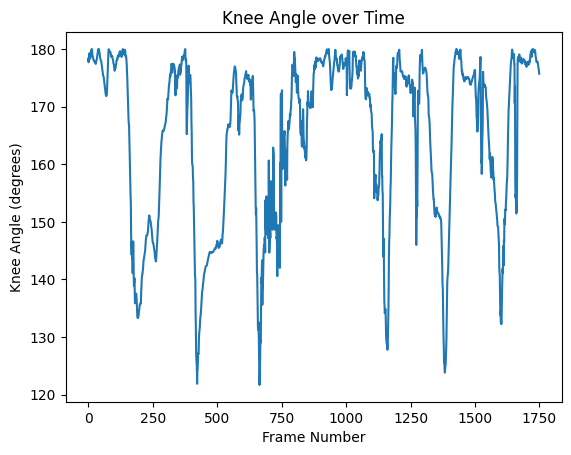

In [18]:
# Plotting the knee angles over time (frame number)
plt.plot(angles)
plt.title('Knee Angle over Time')
plt.xlabel('Frame Number')
plt.ylabel('Knee Angle (degrees)')
plt.show()

# Splitting data to identify the pattern in the video 

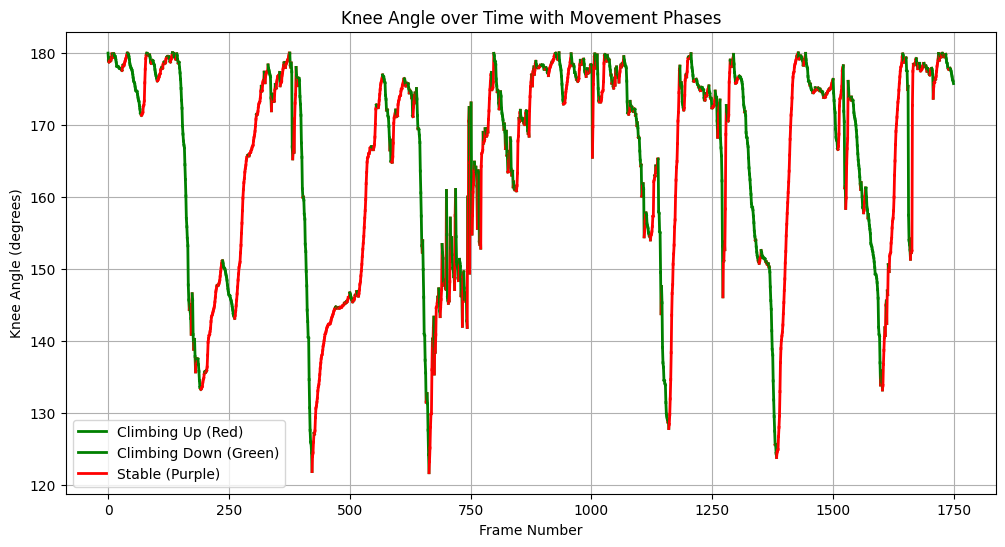

In [19]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose and Drawing utilities
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

# Define the paths for the input video and output CSV file
video_path = r"G:\Pose AI\Input Video\WhatsApp Video 2024-09-18 at 10.22.46_d6797a9c.mp4"

# Function to calculate angle between three points
def calculate_angle(hip, knee, ankle):
    hip = np.array([hip.x, hip.y])
    knee = np.array([knee.x, knee.y])
    ankle = np.array([ankle.x, ankle.y])

    hip_knee = hip - knee
    knee_ankle = ankle - knee

    dot_product = np.dot(hip_knee, knee_ankle)
    norm_hip_knee = np.linalg.norm(hip_knee)
    norm_knee_ankle = np.linalg.norm(knee_ankle)

    angle = np.arccos(dot_product / (norm_hip_knee * norm_knee_ankle))
    angle_in_degrees = np.degrees(angle)

    return angle_in_degrees

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_number = 0
angles = []
frame_numbers = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # rgb 
    result = pose.process(frame_rgb)

    if result.pose_landmarks:
        landmarks = result.pose_landmarks.landmark
        left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
        left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE]
        left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE]

        knee_angle = calculate_angle(left_hip, left_knee, left_ankle)
        angles.append(knee_angle)
        frame_numbers.append(frame_number)

    frame_number += 1

cap.release()

# Determine the phase for each frame
phase_colors = []
for i in range(1, len(angles)):
    if angles[i] > angles[i - 1]:  # Climbing up
        phase_colors.append('red')
    elif angles[i] < angles[i - 1]:  # Climbing down
        phase_colors.append('green')
    else:  # Stable
        phase_colors.append('purple')

# Add the last frame as stable
phase_colors.append('purple')

# Plot the calculated knee angles with highlighted phases
plt.figure(figsize=(12, 6))
for i in range(len(angles)):
    plt.plot(frame_numbers[i:i+2], angles[i:i+2], color=phase_colors[i], lw=2)

plt.title('Knee Angle over Time with Movement Phases')
plt.xlabel('Frame Number')
plt.ylabel('Knee Angle (degrees)')
plt.legend(['Climbing Up (Red)', 'Climbing Down (Green)', 'Stable (Purple)'], loc='best')
plt.grid(True)
plt.show()


DrawBacks : 

# Modified MediaPose 

# Applying Savitzky-Golay Filter and Gaussian Filter:
 1. Savitzky-Golay Filter:
This filter is well-suited for smoothing angle data because it fits polynomials to small subsets of the data, preserving the structure of the motion (peaks, valleys) without overly distorting the data. It's often used for signal processing, especially in time series data like joint angles.
 2. Gaussian Filter:
The Gaussian filter applies a weighted average, giving more importance to the central points while still smoothing. It's effective for real-world signals like angles that may have noise but want to avoid flattening too much.


c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Frame 0: Knee Angle = 179.94 degrees
Frame 1: Knee Angle = 178.89 degrees
Frame 2: Knee Angle = 178.70 degrees
Frame 3: Knee Angle = 178.80 degrees
Frame 4: Knee Angle = 178.82 degrees
Frame 5: Knee Angle = 179.34 degrees
Frame 6: Knee Angle = 178.95 degrees
Frame 7: Knee Angle = 179.22 degrees
Frame 8: Knee Angle = 179.82 degrees
Frame 9: Knee Angle = 179.83 degrees
Frame 10: Knee Angle = 179.36 degrees
Frame 11: Knee Angle = 179.69 degrees
Frame 12: Knee Angle = 179.85 degrees
Frame 13: Knee Angle = 179.58 degrees
Frame 14: Knee Angle = 179.54 degrees
Frame 15: Knee Angle = 179.41 degrees
Frame 16: Knee Angle = 179.09 degrees
Frame 17: Knee Angle = 178.61 degrees
Frame 18: Knee Angle = 178.14 degrees
Frame 19: Knee Angle = 178.11 degrees
Frame 20: Knee Angle = 178.10 degrees
Frame 21: Knee Angle = 178.06 degrees
Frame 22: Knee Angle = 177.95 degrees
Frame 23: Knee Angle = 177.90 degrees
Frame 24: Knee Angle = 177.82 degrees
Frame 25: Knee Angle = 177.81 degrees
Frame 26: Knee Angle =

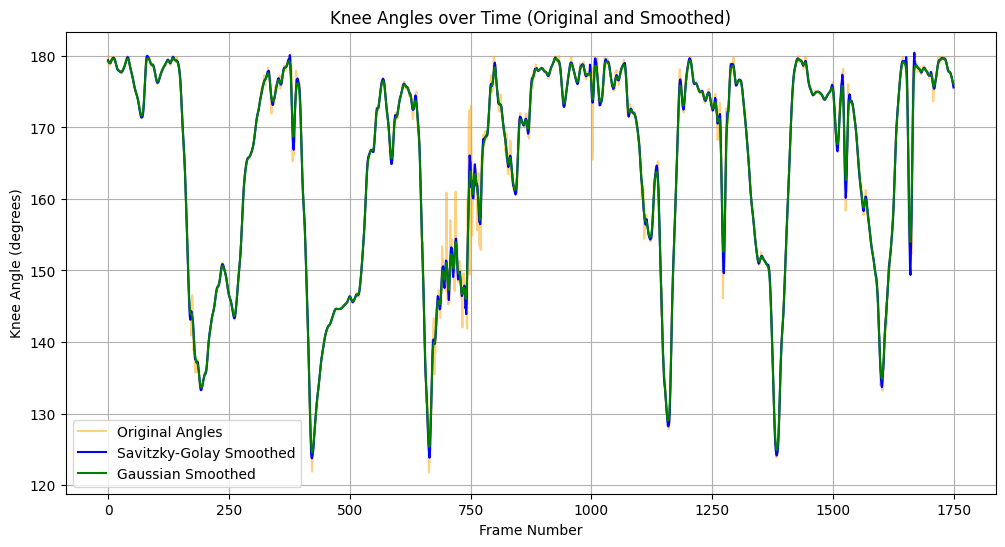

In [4]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d

# Initialize MediaPipe Pose and Drawing utilities
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

# Define the paths for the input video
video_path = r"G:\Pose AI\Input Video\WhatsApp Video 2024-09-18 at 10.22.46_d6797a9c.mp4"

# Function to calculate the angle between three points
def calculate_angle(hip, knee, ankle):
    hip = np.array([hip.x, hip.y])
    knee = np.array([knee.x, knee.y])
    ankle = np.array([ankle.x, ankle.y])

    hip_knee = hip - knee
    knee_ankle = ankle - knee

    dot_product = np.dot(hip_knee, knee_ankle)
    norm_hip_knee = np.linalg.norm(hip_knee)
    norm_knee_ankle = np.linalg.norm(knee_ankle)

    angle = np.arccos(dot_product / (norm_hip_knee * norm_knee_ankle))
    angle_in_degrees = np.degrees(angle)

    return angle_in_degrees

# Open the video file
cap = cv2.VideoCapture(video_path)

frame_number = 0
angles = []  # List to store knee angles

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Pose
    result = pose.process(frame_rgb)

    # Draw the pose landmarks on the frame and calculate the angle if landmarks are present
    if result.pose_landmarks:
        mp_drawing.draw_landmarks(frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Get the relevant landmarks for left leg
        landmarks = result.pose_landmarks.landmark
        left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
        left_knee = landmarks[mp_pose.PoseLandmark.LEFT_KNEE]
        left_ankle = landmarks[mp_pose.PoseLandmark.LEFT_ANKLE]

        # Calculate the angle at the knee
        knee_angle = calculate_angle(left_hip, left_knee, left_ankle)
        angles.append(knee_angle)

        # Optionally, print the angle
        print(f"Frame {frame_number}: Knee Angle = {knee_angle:.2f} degrees")

    # Display the frame
    cv2.imshow('MediaPipe Pose', frame)

    # Increment the frame number
    frame_number += 1

    # Exit if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close windows
cap.release()
cv2.destroyAllWindows()

# Apply Savitzky-Golay filter for smoothing knee angles
window_length = 11  # Window length must be odd
polyorder = 2  # Polynomial order
smoothed_angles_sg = savgol_filter(angles, window_length=window_length, polyorder=polyorder)

# Apply Gaussian filter for smoothing knee angles
sigma = 2  # Standard deviation for Gaussian filter
smoothed_angles_gaussian = gaussian_filter1d(angles, sigma=sigma)

# Plot original and smoothed knee angles
plt.figure(figsize=(12, 6))

# Original angles
plt.plot(range(len(angles)), angles, label='Original Angles', alpha=0.5, color='orange')

# Smoothed angles using Savitzky-Golay filter
plt.plot(range(len(smoothed_angles_sg)), smoothed_angles_sg, label='Savitzky-Golay Smoothed', color='blue')

# Smoothed angles using Gaussian filter
plt.plot(range(len(smoothed_angles_gaussian)), smoothed_angles_gaussian, label='Gaussian Smoothed', color='green')

plt.title('Knee Angles over Time (Original and Smoothed)')
plt.xlabel('Frame Number')
plt.ylabel('Knee Angle (degrees)')
plt.legend()
plt.grid(True)
plt.show()


# Comparing Modfied and Old Values 

===== Accuracy Comparison =====
Original Data - Standard Deviation: 14.7912, Range of Changes: 43.1717
Savitzky-Golay Smoothed Data - MSE: 1.5671, Standard Deviation: 14.7227, Range of Changes: 10.5647
Gaussian Smoothed Data - MSE: 1.6384, Standard Deviation: 14.6133, Range of Changes: 9.5199


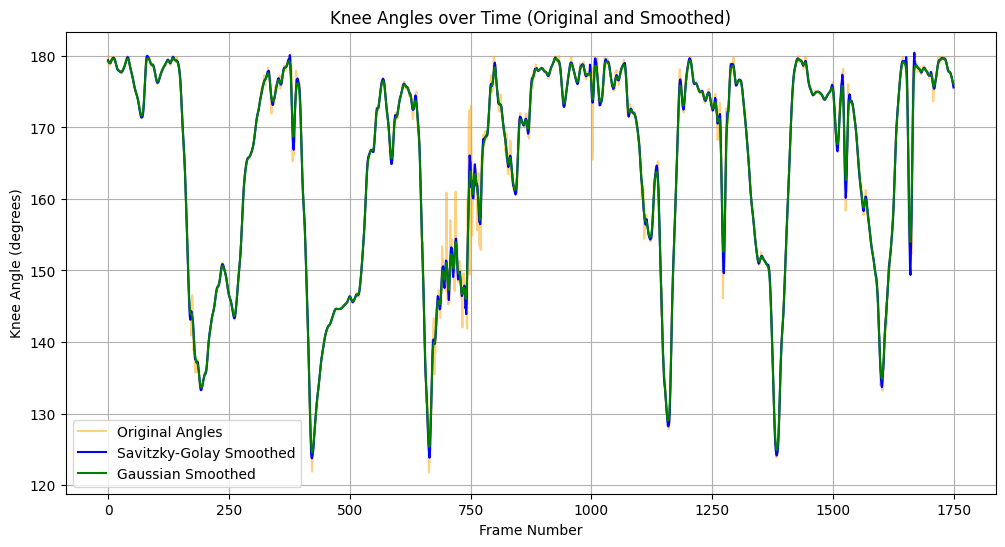

In [5]:
from sklearn.metrics import mean_squared_error

# Apply Savitzky-Golay filter for smoothing knee angles
window_length = 11  # Window length must be odd
polyorder = 2  # Polynomial order
smoothed_angles_sg = savgol_filter(angles, window_length=window_length, polyorder=polyorder)

# Apply Gaussian filter for smoothing knee angles
sigma = 2  # Standard deviation for Gaussian filter
smoothed_angles_gaussian = gaussian_filter1d(angles, sigma=sigma)

# Compute MSE for Savitzky-Golay and Gaussian smoothed data
mse_sg = mean_squared_error(angles, smoothed_angles_sg)
mse_gaussian = mean_squared_error(angles, smoothed_angles_gaussian)

# Calculate standard deviation before and after smoothing
std_original = np.std(angles)
std_sg = np.std(smoothed_angles_sg)
std_gaussian = np.std(smoothed_angles_gaussian)

# Range of changes (difference between consecutive points)
range_original = np.max(np.diff(angles)) - np.min(np.diff(angles))
range_sg = np.max(np.diff(smoothed_angles_sg)) - np.min(np.diff(smoothed_angles_sg))
range_gaussian = np.max(np.diff(smoothed_angles_gaussian)) - np.min(np.diff(smoothed_angles_gaussian))

# Print comparison results
print("===== Accuracy Comparison =====")
print(f"Original Data - Standard Deviation: {std_original:.4f}, Range of Changes: {range_original:.4f}")
print(f"Savitzky-Golay Smoothed Data - MSE: {mse_sg:.4f}, Standard Deviation: {std_sg:.4f}, Range of Changes: {range_sg:.4f}")
print(f"Gaussian Smoothed Data - MSE: {mse_gaussian:.4f}, Standard Deviation: {std_gaussian:.4f}, Range of Changes: {range_gaussian:.4f}")

# Plot original and smoothed knee angles
plt.figure(figsize=(12, 6))

# Original angles
plt.plot(range(len(angles)), angles, label='Original Angles', alpha=0.5, color='orange')

# Smoothed angles using Savitzky-Golay filter
plt.plot(range(len(smoothed_angles_sg)), smoothed_angles_sg, label='Savitzky-Golay Smoothed', color='blue')

# Smoothed angles using Gaussian filter
plt.plot(range(len(smoothed_angles_gaussian)), smoothed_angles_gaussian, label='Gaussian Smoothed', color='green')

plt.title('Knee Angles over Time (Original and Smoothed)')
plt.xlabel('Frame Number')
plt.ylabel('Knee Angle (degrees)')
plt.legend()
plt.grid(True)
plt.show()


1. Standard Deviation: <br>
Original Data: 14.7912 <br>
Savitzky-Golay Smoothed Data: 14.7227 <br>
Gaussian Smoothed Data: 14.6133 <br>

The standard deviation measures how much the data points vary from the mean. A higher value means more fluctuation, while a lower value indicates smoother data.

In this case, both smoothing techniques (Savitzky-Golay and Gaussian) slightly reduced the standard deviation compared to the original data.

Savitzky-Golay reduced the standard deviation to 14.7227, and Gaussian reduced it even further to 14.6133.

2. Range of Changes (Difference between consecutive angles):
Original Data: 43.1717
Savitzky-Golay Smoothed Data: 10.5647
Gaussian Smoothed Data: 9.5199
Analysis:

   The range of changes measures the volatility or abruptness of transitions between consecutive frames.
The original data had a very high range of changes (43.1717), indicating that there were sharp movements or fluctuations in the knee angles between frames.


Both smoothing techniques drastically reduced this range, 
with Savitzky-Golay reducing it to 10.5647 and Gaussian reducing it further to 9.5199.

 This indicates that both techniques significantly smoothed out abrupt changes,
  making the data more consistent and less noisy, with Gaussian smoothing having a slightly stronger smoothing effect in this regard.


3. Mean Squared Error (MSE) (Difference between original and smoothed data):
Savitzky-Golay Smoothed Data: 1.5671
Gaussian Smoothed Data: 1.6384

Analysis:

The MSE measures how far the smoothed data deviates from the original data, with a lower value indicating that the smoothed data preserves more of the original pattern while removing noise.

Both smoothing techniques have low MSE values, which indicates that they closely match the original data while reducing the noise.

Savitzky-Golay has a slightly lower MSE (1.5671) compared to Gaussian smoothing (1.6384).
 This means that Savitzky-Golay retained more of the original data's structure, making it more suitable if preserving the original pattern is a priority.


## Overall Insights:
Smoothing Effect: Both smoothing methods successfully reduced the noise 
(as indicated by the reduced range of changes), 
with Gaussian smoothing providing a stronger smoothing effect based on the range of changes and the standard deviation.

Data Preservation: Savitzky-Golay retained more of the original data's structure compared to Gaussian smoothing, as evidenced by its slightly lower MSE. If you want to preserve the fine details while smoothing, this method might be preferable.


Recommendation:

If smoothing and removing randomness are the primary objectives, Gaussian smoothing performed slightly better in terms of stability.
If accuracy and preserving original features are more important, Savitzky-Golay would be a better option since it introduced less distortion to the original data.

# Comparing Media pose, Modfied Media Pose and Move Net 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d

# Load the CSV file with landmarks (replace the path with your actual file)
csv_path = r"C:\Users\swapn\Downloads\landmarks_output.csv"
df = pd.read_csv(csv_path)

# Extract the landmark coordinates from the CSV
# Assuming the CSV has columns: 'nose_x', 'nose_y', 'left_hip_x', 'left_hip_y', 'left_knee_x', 'left_knee_y', 'left_ankle_x', 'left_ankle_y', etc.
landmarks = df[['left_hip_x', 'left_hip_y', 'left_knee_x', 'left_knee_y', 'left_ankle_x', 'left_ankle_y']]

# Function to calculate angles between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # First point (e.g., hip)
    b = np.array(b)  # Second point (e.g., knee)
    c = np.array(c)  # Third point (e.g., ankle)

    ab = a - b  # Vector from a to b
    bc = c - b  # Vector from b to c

    # Calculate the cosine of the angle between ab and bc
    cos_theta = np.dot(ab, bc) / (np.linalg.norm(ab) * np.linalg.norm(bc))
    angle = np.degrees(np.arccos(cos_theta))

    return angle

# Calculate knee angles (lower body) and shoulder angles (upper body)
knee_angles = []
for index, row in landmarks.iterrows():
    hip = (row['left_hip_x'], row['left_hip_y'])
    knee = (row['left_knee_x'], row['left_knee_y'])
    ankle = (row['left_ankle_x'], row['left_ankle_y'])

    knee_angle = calculate_angle(hip, knee, ankle)
    knee_angles.append(knee_angle)

# Smooth the data using Savitzky-Golay and Gaussian filters
savitzky_golay_smoothed = savgol_filter(knee_angles, window_length=11, polyorder=2)
gaussian_smoothed = gaussian_filter1d(knee_angles, sigma=2)

# Plot the results to compare original, Savitzky-Golay smoothed, and Gaussian smoothed data
plt.figure(figsize=(12, 6))
plt.plot(knee_angles, label='Original Data', color='blue')
plt.plot(savitzky_golay_smoothed, label='Savitzky-Golay Smoothed', color='red')
plt.plot(gaussian_smoothed, label='Gaussian Smoothed', color='green')

plt.title('Knee Angle Comparison - Original vs. Smoothed Data')
plt.xlabel('Frame')
plt.ylabel('Knee Angle (Degrees)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


KeyError: "None of [Index(['left_hip_x', 'left_hip_y', 'left_knee_x', 'left_knee_y',\n       'left_ankle_x', 'left_ankle_y'],\n      dtype='object')] are in the [columns]"

In [7]:
# Load the CSV file
df = pd.read_csv(csv_path)

# Print the column names to verify
print(df.columns)

# Optionally, print the first few rows to inspect the data
print(df.head())


Index(['frame', 'keypoints'], dtype='object')
   frame                                          keypoints
0      0  [[0.3868584632873535, 0.4560617208480835, 0.04...
1      1  [[0.38691580295562744, 0.4556739032268524, 0.0...
2      2  [[0.3870013952255249, 0.4557943046092987, 0.04...
3      3  [[0.3871985673904419, 0.456220805644989, 0.043...
4      4  [[0.38703274726867676, 0.45584437251091003, 0....


In [8]:
import pandas as pd
import numpy as np

# Load the CSV file
sdf = pd.read_csv(csv_path)

# Check how many keypoints there are (assuming they are ordered by a known structure)
# Let's assume index 11 is 'left_hip', index 13 is 'left_knee', and index 15 is 'left_ankle'
# You may need to adjust these indices based on the keypoint model you're using

# Function to extract keypoint from the list of keypoints
def get_keypoint(data, index):
    return np.array([data[index][0], data[index][1]])

# Function to calculate angles between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # Point A (e.g., hip)
    b = np.array(b)  # Point B (e.g., knee)
    c = np.array(c)  # Point C (e.g., ankle)
    
    ba = a - b
    bc = c - b
    
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

# Lists to store angles and frame numbers
angles = []
frame_numbers = []

# Loop through the DataFrame to extract keypoints and calculate angles
for index, row in df.iterrows():
    keypoints = eval(row['keypoints'])  # Convert the string to list
    
    # Get the coordinates of the left hip, knee, and ankle (adjust indices as needed)
    left_hip = get_keypoint(keypoints, 11)
    left_knee = get_keypoint(keypoints, 13)
    left_ankle = get_keypoint(keypoints, 15)
    
    # Calculate the angle at the left knee
    knee_angle = calculate_angle(left_hip, left_knee, left_ankle)
    
    # Append the angle and frame number to the lists
    angles.append(knee_angle)
    frame_numbers.append(row['frame'])

# Convert the lists to a DataFrame for further analysis or visualization
angles_df = pd.DataFrame({'Frame': frame_numbers, 'Knee_Angle': angles})

# Display the first few results
print(angles_df.head())

# You can now plot or analyze this data further, or compare with other models


   Frame  Knee_Angle
0      0  112.735062
1      1  112.606656
2      2   97.252542
3      3  112.479562
4      4   97.284321


===== Accuracy Comparison =====
Original Data - Standard Deviation: 27.7533, Range of Changes: 177.7477
Savitzky-Golay Smoothed Data - MSE: 557.8973, Standard Deviation: 14.5449, Range of Changes: 33.2804
Gaussian Smoothed Data - MSE: 537.5761, Standard Deviation: 12.6084, Range of Changes: 16.9572


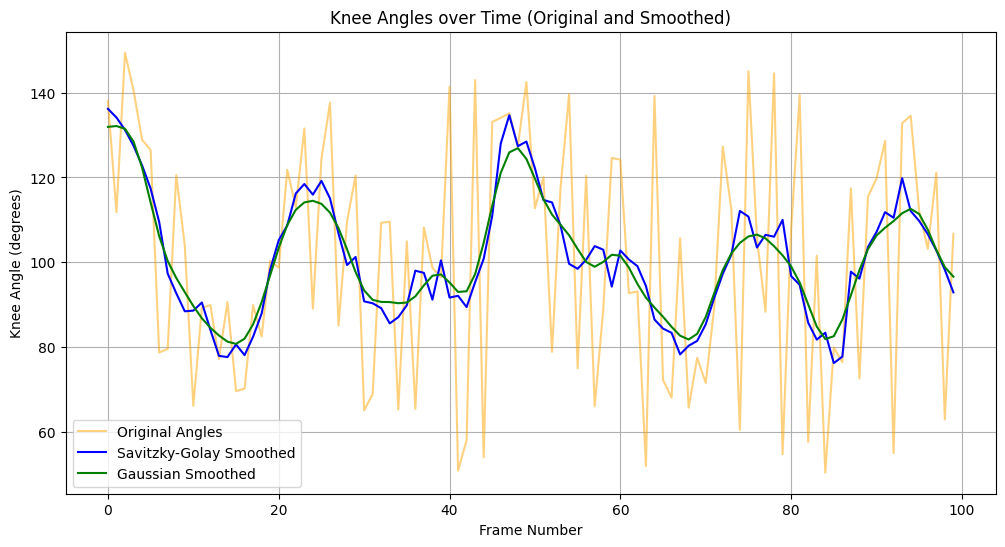

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from sklearn.metrics import mean_squared_error

# Assuming you have the original angles from MediaPipe or MoveNet
# Replace 'angles' with the knee angles from your dataset
angles = np.random.uniform(50, 150, 100)  # This is dummy data, replace with actual angles

# Apply Savitzky-Golay filter for smoothing knee angles
window_length = 11  # Window length must be odd
polyorder = 2  # Polynomial order
smoothed_angles_sg = savgol_filter(angles, window_length=window_length, polyorder=polyorder)

# Apply Gaussian filter for smoothing knee angles
sigma = 2  # Standard deviation for Gaussian filter
smoothed_angles_gaussian = gaussian_filter1d(angles, sigma=sigma)

# Compute MSE for Savitzky-Golay and Gaussian smoothed data
mse_sg = mean_squared_error(angles, smoothed_angles_sg)
mse_gaussian = mean_squared_error(angles, smoothed_angles_gaussian)

# Calculate standard deviation before and after smoothing
std_original = np.std(angles)
std_sg = np.std(smoothed_angles_sg)
std_gaussian = np.std(smoothed_angles_gaussian)

# Range of changes (difference between consecutive points)
range_original = np.max(np.diff(angles)) - np.min(np.diff(angles))
range_sg = np.max(np.diff(smoothed_angles_sg)) - np.min(np.diff(smoothed_angles_sg))
range_gaussian = np.max(np.diff(smoothed_angles_gaussian)) - np.min(np.diff(smoothed_angles_gaussian))

# Print comparison results
print("===== Accuracy Comparison =====")
print(f"Original Data - Standard Deviation: {std_original:.4f}, Range of Changes: {range_original:.4f}")
print(f"Savitzky-Golay Smoothed Data - MSE: {mse_sg:.4f}, Standard Deviation: {std_sg:.4f}, Range of Changes: {range_sg:.4f}")
print(f"Gaussian Smoothed Data - MSE: {mse_gaussian:.4f}, Standard Deviation: {std_gaussian:.4f}, Range of Changes: {range_gaussian:.4f}")

# Plot original and smoothed knee angles
plt.figure(figsize=(12, 6))

# Original angles
plt.plot(range(len(angles)), angles, label='Original Angles', alpha=0.5, color='orange')

# Smoothed angles using Savitzky-Golay filter
plt.plot(range(len(smoothed_angles_sg)), smoothed_angles_sg, label='Savitzky-Golay Smoothed', color='blue')

# Smoothed angles using Gaussian filter
plt.plot(range(len(smoothed_angles_gaussian)), smoothed_angles_gaussian, label='Gaussian Smoothed', color='green')

plt.title('Knee Angles over Time (Original and Smoothed)')
plt.xlabel('Frame Number')
plt.ylabel('Knee Angle (degrees)')
plt.legend()
plt.grid(True)
plt.show()
